In [1]:
# --- Step 1: Mount Google Drive ---
from google.colab import drive
drive.mount('/content/drive')

# --- Step 2: Import Libraries ---
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os


Mounted at /content/drive


In [2]:
# --- Step 3: Set Dataset Path ---
dataset_path = '/content/drive/MyDrive/dogvscat'  # Ensure this folder has 'cat' and 'dog'

# --- Step 4: Create Data Generators ---
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [3]:
# --- Step 5: Build CNN Model ---
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# --- Step 6: Compile Model ---
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 273s 11s/step - accuracy: 0.5543 - loss: 0.6946 - val_accuracy: 0.5000 - val_loss: 0.6711
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 795ms/step - accuracy: 0.6571 - loss: 0.6457 - val_accuracy: 0.7450 - val_loss: 0.6008
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 811ms/step - accuracy: 0.7561 - loss: 0.5476 - val_accuracy: 0.7400 - val_loss: 0.5246
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 801ms/step - accuracy: 0.7831 - loss: 0.4866 - val_accuracy: 0.7600 - val_loss: 0.4747
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 822ms/step - accuracy: 0.8177 - loss: 0.4319 - val_accuracy: 0.8250 - val_loss: 0.4299
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 809ms/step - accuracy: 0.8048 - loss: 0.4465 - val_accuracy: 0.8300 - val_loss: 0.4030
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 822ms/step - accuracy: 0.8508 - loss: 0.3530 - val_accuracy: 0.8400 - val_loss: 0.3919
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 798ms/step - accuracy: 0.8401 - loss: 0.3822 - val_accur

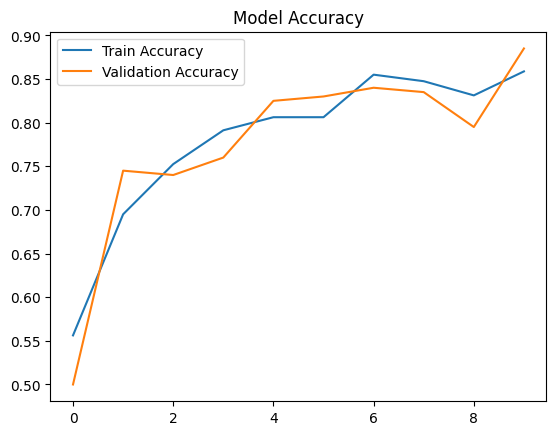

In [4]:
# --- Step 7: Train Model ---
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

# --- Step 8: Plot Accuracy ---
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# --- Optional: Save Model after Training ---
model.save('/content/drive/MyDrive/dog_cat_model.h5')


In [5]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/dog_cat_model.h5')


In [6]:
# --- Step 9: Prediction Function ---
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction[0])
    class_label = list(train_generator.class_indices.keys())[class_idx]
    plt.imshow(image.load_img(img_path))
    plt.title(f'Prediction: {class_label}')
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step


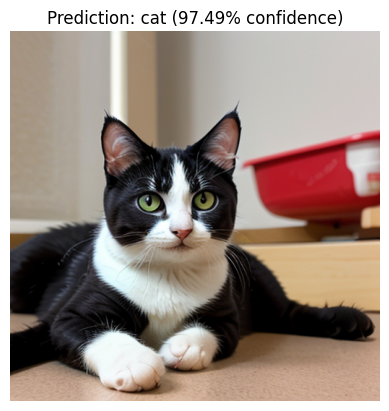

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


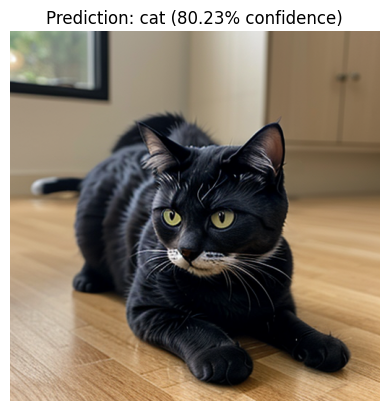

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


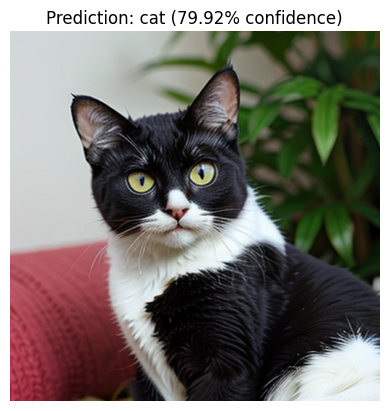

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


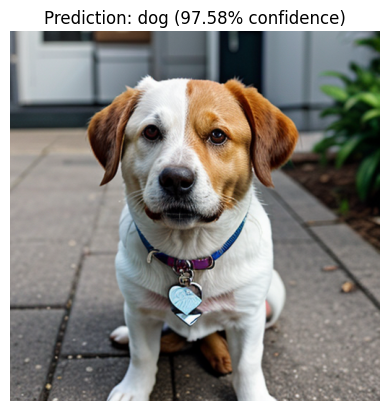

In [8]:
import random
import glob

# --- Step 10: Pick random test images safely ---
# Adjust folder names if yours are different
cat_images = glob.glob(os.path.join(dataset_path, 'cat', '*'))
dog_images = glob.glob(os.path.join(dataset_path, 'dog', '*'))

# Combine both lists
all_images = cat_images + dog_images

# Check if images exist
if len(all_images) == 0:
    print("⚠️ No images found in dataset_path. Check if folders 'cat' and 'dog' exist and contain images.")
else:
    # Pick up to 4 random images (or fewer if not enough)
    num_to_pick = min(4, len(all_images))
    random_images = random.sample(all_images, num_to_pick)

    # --- Step 11: Predict each image ---
    from tensorflow.keras.preprocessing import image

    for img_path in random_images:
        img = image.load_img(img_path, target_size=(150, 150))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        prediction = model.predict(img_array)
        class_idx = np.argmax(prediction[0])
        confidence = np.max(prediction[0]) * 100
        class_label = list(train_generator.class_indices.keys())[class_idx]

        # Display image and prediction
        plt.imshow(image.load_img(img_path))
        plt.title(f"Prediction: {class_label} ({confidence:.2f}% confidence)")
        plt.axis('off')
        plt.show()
